In [74]:
import pandas as pd
df = pd.read_csv('0412_features.csv')

In [75]:
features = df.drop(columns=['cellId'])


In [82]:
features.shape

(1420, 13)

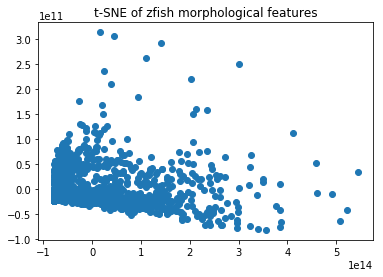

In [77]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, init='pca').fit_transform(features)
X_embedded.shape

import matplotlib.pyplot as plt
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], cmap=plt.cm.Spectral)
plt.title("t-SNE of zfish morphological features")
plt.axis('tight')
plt.show()

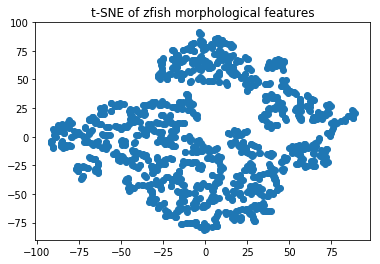

In [78]:
from scipy.stats import zscore
normalized_features = features.apply(zscore)

import numpy as np
from sklearn.manifold import TSNE
TSNE_OP = TSNE(n_components=2, perplexity=7, init='pca')
# print(TSNE_OP.kl_divergence)
Y = TSNE_OP.fit_transform(normalized_features)
# print(TSNE_OP.kl_divergence)

import matplotlib.pyplot as plt
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.title("t-SNE of zfish morphological features")
plt.axis('tight')

plt.show()

In [79]:
TSNE_OP.kl_divergence_

1.0871602296829224

In [80]:
import sys
sys.path.append("/usr/people/jingpeng/lib/tsne_python/tsne_python")
from tsne import tsne

Y = tsne(normalized_features, no_dims=2, perplexity=7 )

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1420...
Computing P-values for point 500 of 1420...
Computing P-values for point 1000 of 1420...
Mean value of sigma: 0.613054
Iteration 10: error is 24.593630
Iteration 20: error is 21.817785
Iteration 30: error is 19.128632
Iteration 40: error is 17.873386
Iteration 50: error is 17.356775
Iteration 60: error is 17.060163
Iteration 70: error is 16.945983
Iteration 80: error is 16.842845
Iteration 90: error is 16.757384
Iteration 100: error is 16.692018
Iteration 110: error is 2.493560
Iteration 120: error is 2.202185
Iteration 130: error is 1.970766
Iteration 140: error is 1.791455
Iteration 150: error is 1.657649
Iteration 160: error is 1.563049
Iteration 170: error is 1.496525
Iteration 180: error is 1.443614
Iteration 190: error is 1.398715
Iteration 200: error is 1.360785
Iteration 210: error is 1.328822
Iteration 220: error is 1.301492
Iteration 230: error is 1.277962
Iteration 2

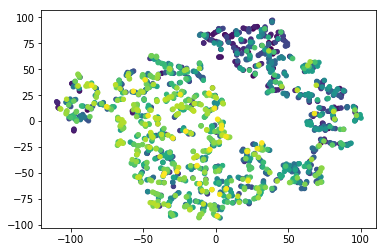

In [86]:
import pylab
labels = df["cellId"]
p = pylab.scatter(Y[:,0], Y[:,1], 20, labels)
pylab.show()

In [115]:
import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Scatter(
    x = Y[:,0],
    y = Y[:,1],
    mode = 'markers',
    text = df.cellId
)

data = [trace]

py.iplot(data, filename='basic-scatter')

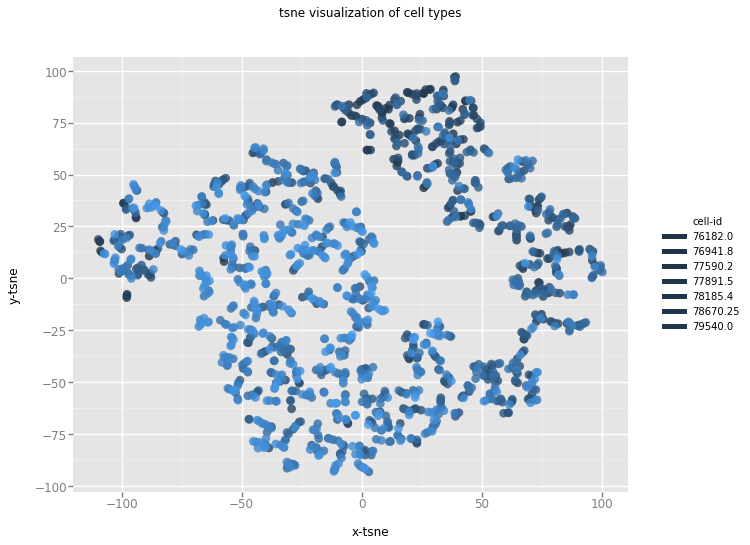

<ggplot: (8753747646924)>

In [112]:
from ggplot import *

df_tsne = pd.DataFrame.from_items([('x-tsne', Y[:,0]), ('y-tsne', Y[:,1]), ('cell-id', df.cellId)])

chart = ggplot(aes(x='x-tsne', y='y-tsne', color='cell-id'), data=df_tsne) +\
        geom_point(size=75,alpha=0.8) +\
        ggtitle("tsne visualization of cell types")
chart

In [108]:
df_tsne 

,x-tsne,y-tsne
0,25.896040,88.946094
1,46.777949,78.574735
2,73.694769,-1.981032
3,38.154126,69.625603
4,43.194119,85.536529
5,72.838481,-20.763957
6,37.372485,81.847195
7,36.631342,75.618070
8,3.476759,69.310477
9,18.979708,49.152499
